<a href="https://colab.research.google.com/github/prateektrivedi21/Stress-Level-Detection-from-Lifestyle-Data/blob/main/Stress_Level_Detection_from_lifestyle_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import warnings

warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
stress = pd.read_csv("Health_and_lifestyle.csv")

In [3]:
# Display the first 5 rows and statistical summary
stress.head()
print(stress.describe())
print(f"Shape of the dataset: {stress.shape}")

        Person ID         Age  Sleep Duration  Quality of Sleep  \
count  374.000000  374.000000      374.000000        374.000000   
mean   187.500000   42.184492        7.132086          7.312834   
std    108.108742    8.673133        0.795657          1.196956   
min      1.000000   27.000000        5.800000          4.000000   
25%     94.250000   35.250000        6.400000          6.000000   
50%    187.500000   43.000000        7.200000          7.000000   
75%    280.750000   50.000000        7.800000          8.000000   
max    374.000000   59.000000        8.500000          9.000000   

       Physical Activity Level  Stress Level  Heart Rate   Daily Steps  
count               374.000000    374.000000  374.000000    374.000000  
mean                 59.171123      5.385027   70.165775   6816.844920  
std                  20.830804      1.774526    4.135676   1617.915679  
min                  30.000000      3.000000   65.000000   3000.000000  
25%                  45.000000 

In [4]:
# Checking the null values
print(stress.isnull().sum())

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


In [5]:
# Fill missing values
stress = stress.fillna("Nothing")

In [6]:
# Replace "Normal Weight" with "Normal" in the "BMI Category" column
stress["BMI Category"] = stress["BMI Category"].replace("Normal Weight", "Normal")

In [7]:
# Check for duplicate rows
duplicate_rows = stress[stress.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [Person ID, Gender, Age, Occupation, Sleep Duration, Quality of Sleep, Physical Activity Level, Stress Level, BMI Category, Blood Pressure, Heart Rate, Daily Steps, Sleep Disorder]
Index: []


In [8]:
# Drop duplicate rows based on 'Person ID' and 'Gender'
stress = stress.drop_duplicates(subset=['Person ID', 'Gender'])

In [9]:
# Label encoding for categorical columns
label_encoder = LabelEncoder()
cat_cols = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']
for col in cat_cols:
    stress[col] = label_encoder.fit_transform(stress[col])

In [10]:
# Split 'Blood Pressure' into 'Systolic BP' and 'Diastolic BP'
stress[['Systolic BP', 'Diastolic BP']] = stress['Blood Pressure'].str.split('/', expand=True).apply(pd.to_numeric)
stress = stress.drop('Blood Pressure', axis=1)

In [11]:
# Drop unnecessary columns
stress.drop(['Person ID', 'Sleep Disorder', 'Physical Activity Level', 'Diastolic BP', 'Quality of Sleep'], axis=1, inplace=True)

In [12]:
# Reorder columns to move 'Stress Level' to the end
stress_level_index = stress.columns.get_loc('Stress Level')
columns = list(stress.columns[:stress_level_index]) + list(stress.columns[stress_level_index+1:]) + ['Stress Level']
stress = stress[columns]

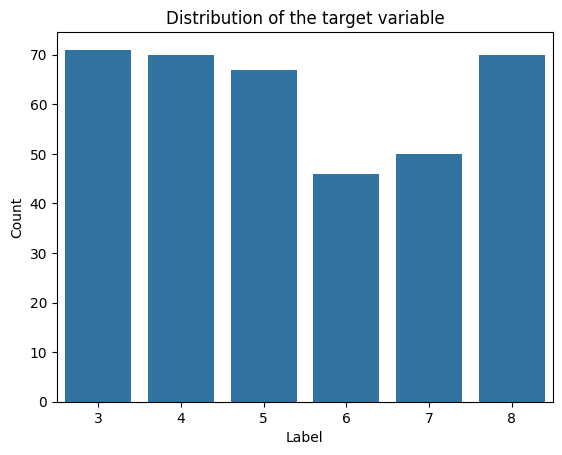

In [13]:
# Visualization
sns.countplot(x='Stress Level', data=stress)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of the target variable')
plt.show()

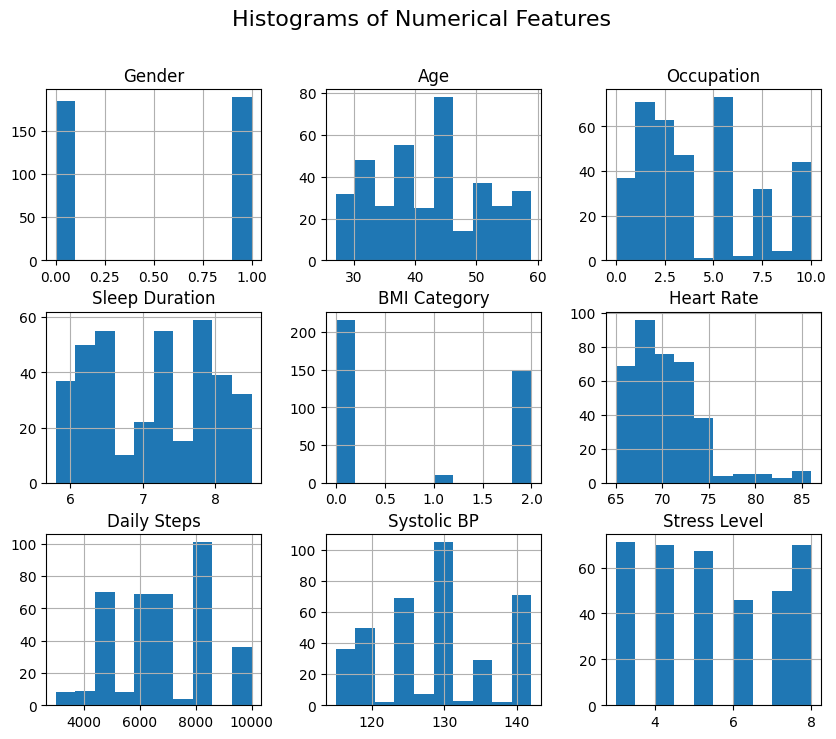

In [14]:
# Histograms for each numerical feature
stress.hist(figsize=(10, 8))
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()

In [15]:
# Violin plot
fig = px.violin(stress, x='Heart Rate', y='Stress Level', title='Stress Distribution by Heart Rate', color_discrete_sequence=['#FFD700'])
fig.update_layout(xaxis_title='Heart Rate', yaxis_title='Stress Level', width=600, height=500)
fig.show()

In [16]:
# Pie chart
fig = px.pie(stress['Occupation'].value_counts(),
             names=stress['Occupation'].value_counts().index,
             title='Distribution of Occupation', width=600, height=500)
fig.show()

In [17]:
# Box plot
fig = px.box(stress, x='Stress Level', y='Occupation', title='Stress Level Distribution by Occupation', color_discrete_sequence=['lightgreen'])
fig.update_layout(xaxis_title='Stress Level', yaxis_title='Occupation', width=600, height=500)
fig.show()

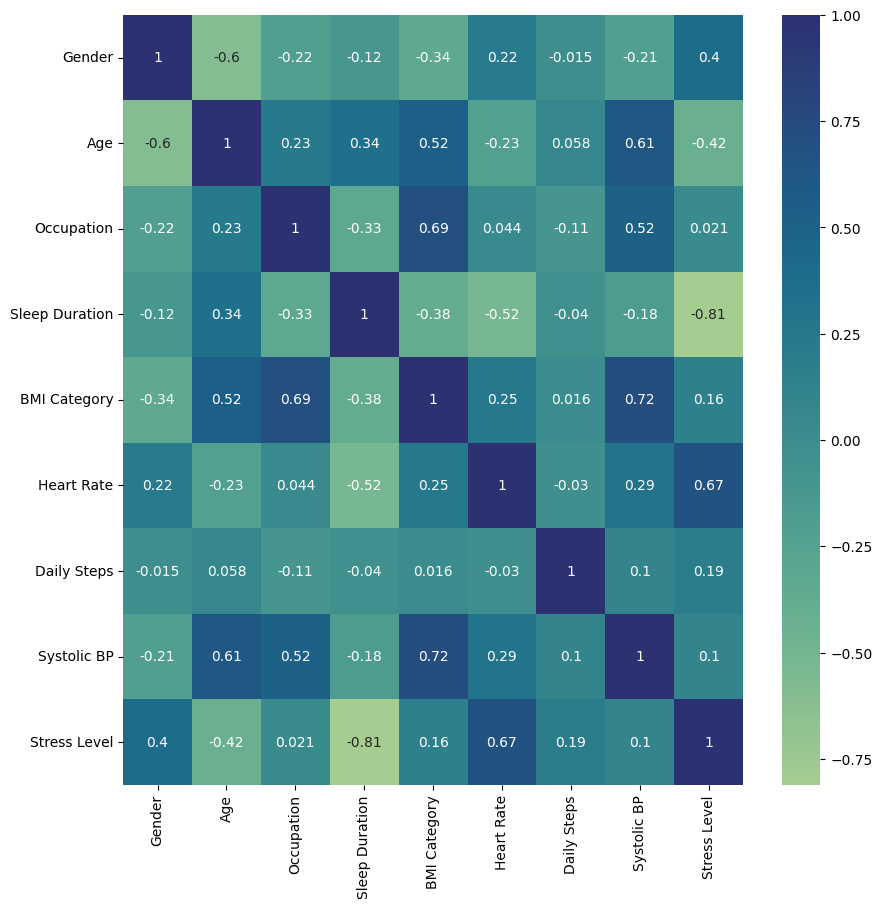

In [18]:
# Heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(stress.corr(), cmap='crest', annot=True)
plt.show()

In [19]:
# Split the data into features (X) and the target variable (y)
X = stress.drop(['Stress Level'], axis=1)
y = stress['Stress Level']

In [20]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (299, 8)
y_train shape: (299,)
X_test shape: (75, 8)
y_test shape: (75,)


In [22]:
# Train and evaluate models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'SVM': svm.SVC(kernel='linear'),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Decision Tree': DecisionTreeClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy * 100
    print(f"{name} - Accuracy: {accuracy * 100:.2f}%")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("\n")

Logistic Regression - Accuracy: 48.00%
Confusion Matrix:
[[12  0  0  0  0  0]
 [ 0  4  0  0  0  6]
 [ 0  1 11  0  2  0]
 [ 0  1  0  8  1  0]
 [ 1 10  0  0  1  0]
 [ 0  9  5  1  2  0]]
Classification Report:
              precision    recall  f1-score   support

           3       0.92      1.00      0.96        12
           4       0.16      0.40      0.23        10
           5       0.69      0.79      0.73        14
           6       0.89      0.80      0.84        10
           7       0.17      0.08      0.11        12
           8       0.00      0.00      0.00        17

    accuracy                           0.48        75
   macro avg       0.47      0.51      0.48        75
weighted avg       0.44      0.48      0.45        75



Naive Bayes - Accuracy: 90.67%
Confusion Matrix:
[[12  0  0  0  0  0]
 [ 0  8  1  1  0  0]
 [ 1  0 12  0  1  0]
 [ 0  1  0  8  0  1]
 [ 0  0  0  0 12  0]
 [ 0  0  0  1  0 16]]
Classification Report:
              precision    recall  f1-score   sup

In [23]:
# Create a DataFrame with the results
df_results = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy Score'])

In [24]:
# Plot the comparison of model accuracy
fig = px.bar(df_results, x='Model', y='Accuracy Score', text='Accuracy Score',
             title='Comparison of Model Accuracy', color='Model',
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(width=700, height=600)
fig.show()

In [28]:
# Function to get user input
def get_user_input():
    gender = int(input("Gender (Male: 1, Female: 0): "))
    age = int(input("Age: "))
    print("['Scientist =0','Doctor =1', 'Accountant =2', 'Teacher =3', 'Manager =4', 'Engineer =5', 'Sales Representative =6', 'Lawyer =7', 'Salesperson =8', 'Software Engineer =9', 'Nurse =10']")
    occupation = int(input("Occupation (encoded): "))
    sleep_duration = float(input("Sleep Duration (hours): "))
    bmi_category = int(input("BMI Category (Underweight: 1, Normal: 2, Overweight: 3): "))
    heart_rate = int(input("Heart Rate (bpm): "))
    daily_steps = int(input("Daily Steps: "))
    systolic_bp = int(input("Systolic Blood Pressure: "))
    diastolic_bp = int(input("Diastolic Blood Pressure: "))

    return np.array([[gender, age, occupation, sleep_duration, bmi_category, heart_rate, daily_steps, systolic_bp]])

In [29]:
# Map numeric predictions to stress level descriptions
stress_levels = {
    0: "No Stress",
    1: "Slightly Low",
    2: "Low",
    3: "Below Moderate",
    4: "Moderate",
    5: "Above Moderate",
    6: "Slightly High",
    7: "High",
    8: "Dangerously High"
}

In [30]:
# Get user input and predict stress level
user_input = get_user_input()
predicted_stress_level_num = models['Random Forest'].predict(user_input)[0]
predicted_stress_level = stress_levels.get(predicted_stress_level_num, "Unknown Level")
print("Predicted Stress Level:", predicted_stress_level)

Gender (Male: 1, Female: 0): 0
Age: 56
['Scientist =0','Doctor =1', 'Accountant =2', 'Teacher =3', 'Manager =4', 'Engineer =5', 'Sales Representative =6', 'Lawyer =7', 'Salesperson =8', 'Software Engineer =9', 'Nurse =10']
Occupation (encoded): 1
Sleep Duration (hours): 8.2
BMI Category (Underweight: 1, Normal: 2, Overweight: 3): 2
Heart Rate (bpm): 65
Daily Steps: 10000
Systolic Blood Pressure: 118
Diastolic Blood Pressure: 75
Predicted Stress Level: Below Moderate
